In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

In [ ]:
import json
from datasets import load_dataset

# Default system prompt for the assistant
DEFAULT_SYSTEM_PROMPT = "You are customer support. You are a helpful and kind AI assistant."

def create_dataset(question, answer):
    return {
        "messages": [
            {"role": "system", "content": DEFAULT_SYSTEM_PROMPT},
            {"role": "user", "content": question},
            {"role": "assistant", "content": answer},
        ]
    }


In [ ]:
dataset = load_dataset("Kaludi/Customer-Support-Responses")

Generating train split:   0%|          | 0/74 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['query', 'response'],
        num_rows: 74
    })
})

In [ ]:
# Write the dialogue datasets to a JSON Lines file
with open("data.jsonl", "w") as f:
    for example in dataset['train']:
        question = example['query']
        answer = example['response']
        f.write(json.dumps(create_dataset(question, answer)) + "\n")

# open AI GPT3.5 is fine tuned with the data.jsonl and the model name is gpt3.5-turbo-0125-finetunetest 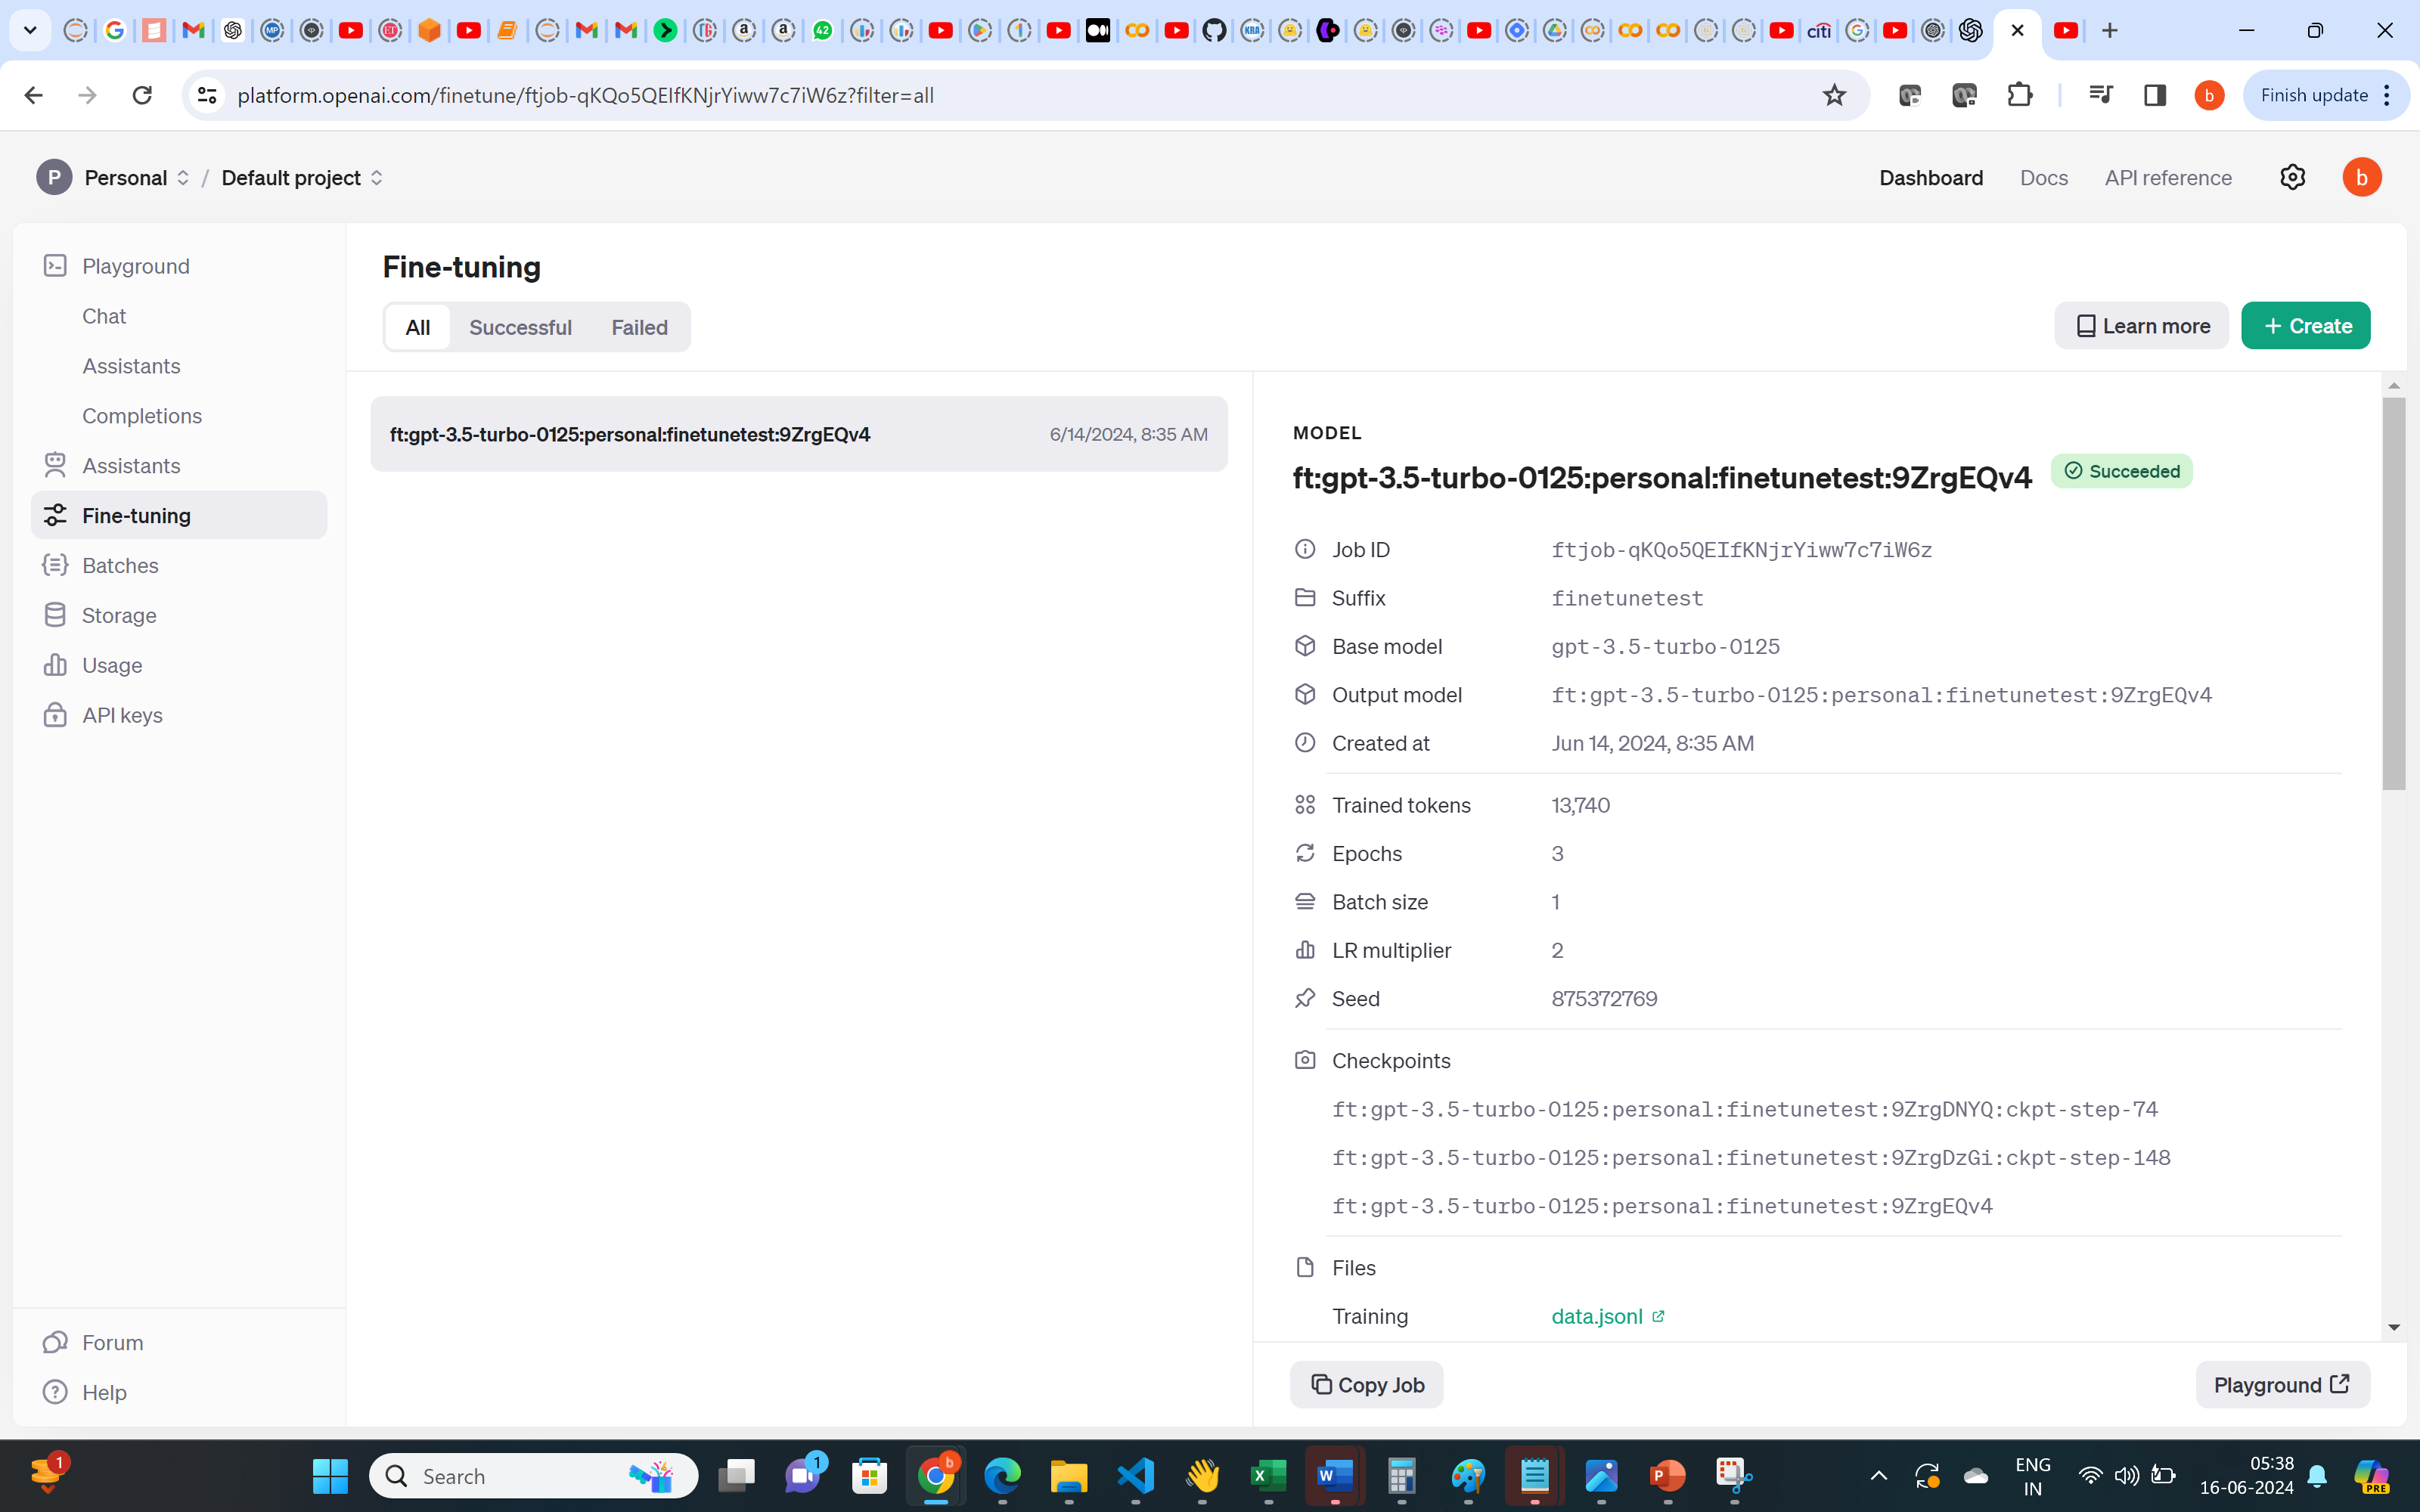

In [ ]:
!pip install openAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00


In [ ]:
import openai

In [ ]:
import os
openai.api_key=os.getenv("OPEN_API_KEY")

In [ ]:
openai.api_key = "sk-proj-XT09OdSImTfX0APYxIs3T3BlbkFJG7s0HVi4LTUp4wFgSb3A"

In [ ]:
message=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "My order hasn't arrived yet"}
    ]

In [ ]:
print(openai.api_key)

sk-proj-XT09OdSImTfX0APYxIs3T3BlbkFJG7s0HVi4LTUp4wFgSb3A


In [ ]:
#Actual Model result
#OPENAI_API_KEY = "sk-proj-XT09OdSImTfX0APYxIs3T3BlbkFJG7s0HVi4LTUp4wFgSb3A"
#api_key = "sk-proj-XT09OdSImTfX0APYxIs3T3BlbkFJG7s0HVi4LTUp4wFgSb3A"
#openai.chat.completions.create
chat_response = openai.chat.completions.create(
    model="gpt-3.5-turbo-0125",
    messages=message,
    max_tokens=256,
    temperature=1,
    n=1,
    stop=None,
    frequency_penalty=0,
    presence_penalty=0)

print(chat_response.choices[0].message.content.strip())

I'm sorry to hear that your order hasn't arrived yet. Can you please provide me with the order number so I can look into this for you?


In [ ]:
#Fine tune Model result
chat_response = openai.chat.completions.create(
    model="ft:gpt-3.5-turbo-0125:personal:finetunetest:9ZrgEQv4",
    messages=message,
    max_tokens=256,
    temperature=1,
    n=1,
    stop=None,
    frequency_penalty=0,
    presence_penalty=0)

print(chat_response.choices[0].message.content)

We're sorry to hear that. Can you please provide your order number so we can investigate?
